### Poisson Distribution Basics

Standard Deviation of the Poisson Distribution: 1.734072698331878
the square root of μ: 1.7320508075688772


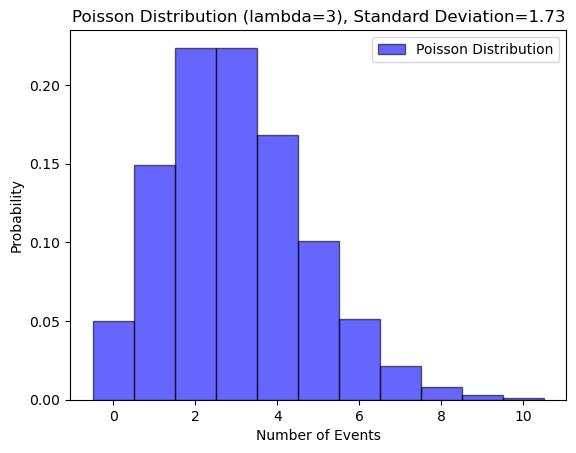

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_param = 3 # Average rate of occurance (lambda)
sample_size = 100000 # Number of samples to generate

poisson_sample = np.random.poisson(lambda_param, sample_size)

poisson_std_dev = np.std(poisson_sample)
print("Standard Deviation of the Poisson Distribution:", poisson_std_dev)

a = np.sqrt(lambda_param)
print("the square root of \u03BC:", a)

w = 2 # Specify bin width to use

plt.hist(poisson_sample, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], 
         edgecolor='black', density=True, alpha=0.6, color='b', 
         label='Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution (lambda={}), Standard Deviation={:.2f}'.format(lambda_param, poisson_std_dev))
plt.legend(loc='upper right')
plt.show()



### Poisson Distribution

6.325973453032284


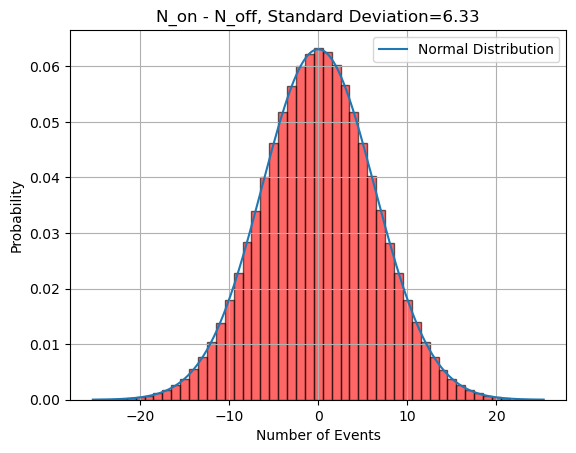

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_param = 20 # Average rate of occurance (lambda)
N = 10000000 # Number of samples to generate

N_on_poisson_sample = np.random.poisson(lambda_param, N)

N_off_poisson_sample = np.random.poisson(lambda_param, N)

N_diff = N_on_poisson_sample - N_off_poisson_sample

mean = 0 # Set mu equal to zero

N_diff_std_dev = np.std(N_diff)
print(N_diff_std_dev)

# Generate x values
x = np.linspace(mean - 4 * N_diff_std_dev, mean + 4 * N_diff_std_dev, 1000)

# Compute the probability density function  
pdf = (1 / (N_diff_std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / N_diff_std_dev) ** 2)  

bins1 = np.arange(-22.5,22.5,1)

# Plot the histogram for the difference (N_on - N_off) + normal distribution
plt.hist(N_diff, bins=bins1, edgecolor='black', density=True, alpha=0.6, 
         color='r')
plt.plot(x, pdf, label='Normal Distribution')
plt.title('N_on - N_off, Standard Deviation={:.2f}'.format(N_diff_std_dev))
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()









### Li + Ma Paper work

Standard Deviation of the Poisson Distribution: 4.471683555777157
the square root of μ: 4.47213595499958


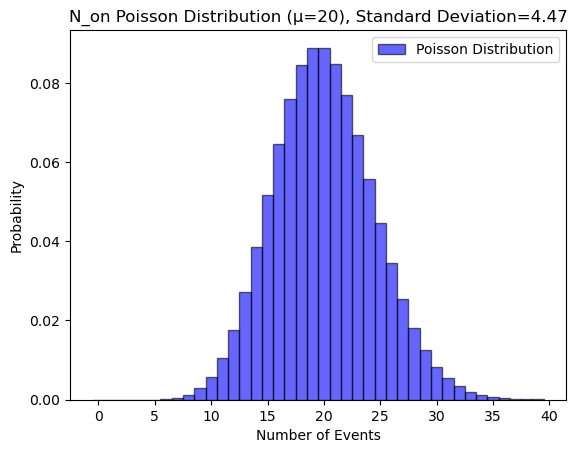

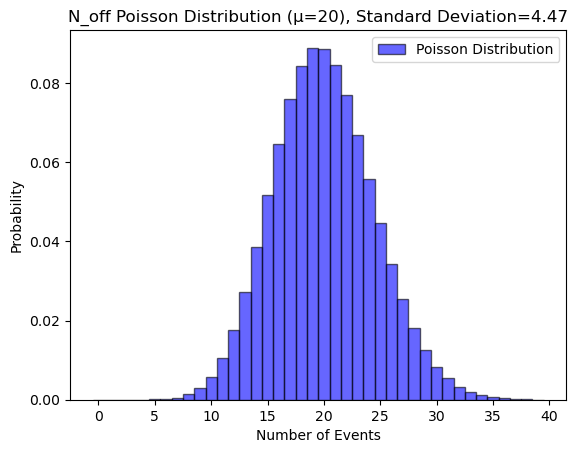

Standard deviation = 6.324268249006736


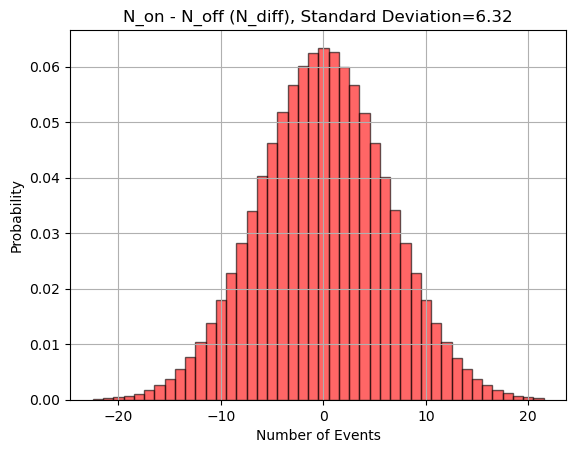

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_param = 20 # Average rate of occurance (lambda)
N = 10000000 # Number of samples to generate

N_on_poisson_sample = np.random.poisson(lambda_param, N)

poisson_std_dev = np.std(N_on_poisson_sample)
print("Standard Deviation of the Poisson Distribution:", poisson_std_dev)

a = np.sqrt(lambda_param)
print("the square root of \u03BC:", a)

bins = np.arange(-0.5, 40.5, 1) # Set the bin width and number of bins

# Plot the histogram for N_on Poisson distribution
plt.hist(N_on_poisson_sample, bins=bins, edgecolor='black', density=True, alpha=0.6, 
         color='b', label='Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('N_on Poisson Distribution (\u03BC={}), Standard Deviation={:.2f}'.format(lambda_param, poisson_std_dev))
plt.legend(loc='upper right')
plt.show()

N_off_poisson_sample = np.random.poisson(lambda_param, N)

# Plot the histogram for N_off Poisson distribution
plt.hist(N_off_poisson_sample, bins=bins, edgecolor='black', density=True, alpha=0.6, 
         color='b', label='Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('N_off Poisson Distribution (\u03BC={}), Standard Deviation={:.2f}'.format(lambda_param, poisson_std_dev))
plt.legend(loc='upper right')
plt.show()


# %% Plot the histogram for the difference (N_on - N_off)

N_diff = N_on_poisson_sample - N_off_poisson_sample

N_diff_std_dev = np.std(N_diff)
print('Standard deviation =', N_diff_std_dev)

bins1 = np.arange(-22.5,22.5,1)

plt.hist(N_diff, bins=bins1, edgecolor='black', density=True, alpha=0.6, 
         color='r')
plt.title('N_on - N_off (N_diff), Standard Deviation={:.2f}'.format(N_diff_std_dev))
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.grid()
plt.show()


### Equation 17.py

[ 3.1 -7.3 -6.8 ...  2.  -0.5  2.3]
Mean of N_diff distribution: 0.0007435359999987379
Standard deviation of N_diff = 4.690499021165468


C:\Users\seano\AppData\Local\Temp\ipykernel_1280\2386942432.py:33: RuntimeWarning: divide by zero encountered in log
  a = np.log(((1 + alpha)/alpha) * (N_on / (N_on + N_off)))
C:\Users\seano\AppData\Local\Temp\ipykernel_1280\2386942432.py:37: RuntimeWarning: invalid value encountered in multiply
  S = np.sqrt(2)*(N_on*a + N_off*b)**(1/2)


Shapiro-Wilk test statistic: nan
p-value: 1.0
The data appears to be normally distributed.


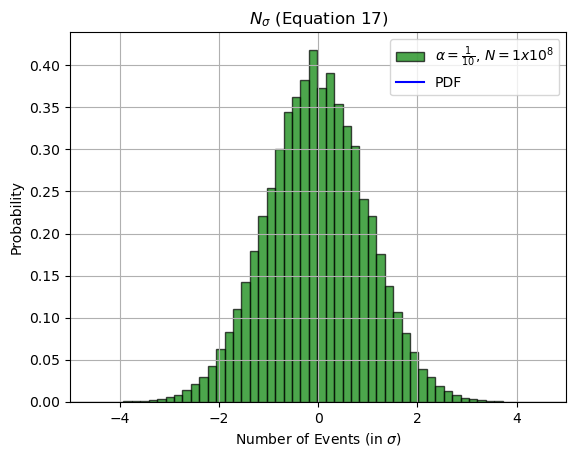

In [4]:

# Estimate significance of result using equation (17) in Li & Ma
# Observe N_off for 6 times longer than N_on

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

lambda_param = 20  # Average rate of occurrence (lambda)
N = int(1e8)  # Number of samples to generate
alpha = 0.1  # Ratio of on-source time to off-source time

# Generate on-source Poisson samples
N_on = np.random.poisson(lambda_param, N)

# Adjust distribution size for off-source Poisson samples
N_off = np.random.poisson(10*lambda_param, N)

# Calculate the difference with the alpha parameter
N_sig = N_on - alpha*N_off

N_sign_sig = np.sign(N_sig)

# Calculate the standard deviation of the difference
print(N_sig)
N_sig_std_dev = np.std(N_sig)
N_sig_mean = np.mean(N_sig)
print("Mean of N_diff distribution:", N_sig_mean)
print("Standard deviation of N_diff =", N_sig_std_dev)

# %%  Plot the histogram for new N_sigma distribution

# Name some variables 
a = np.log(((1 + alpha)/alpha) * (N_on / (N_on + N_off)))
b = np.log((1 + alpha) * (N_off / (N_on + N_off)))

# Equation 17  
S = np.sqrt(2)*(N_on*a + N_off*b)**(1/2) 

S = S * N_sign_sig

mean = 0

# Test for normality using Shapiro-Wilk test
statistic, p_value = shapiro(S)
print('Shapiro-Wilk test statistic:', statistic)
print('p-value:', p_value)

if p_value > 0.05:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.')

# Generate data points for the standard normal distribution
x = np.linspace(-5, 5, 1000)  # Choose a range that covers the distribution well

# Compute the probability density function  
pdf = (1 / (np.std(S) * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / np.std(S)) ** 2)

# Create appropriate sized bins
bins2 = np.arange(min(N_sig),max(N_sig),0.17)

# Plot the histogram and the normal distribution
plt.hist(S, bins=bins2, edgecolor='black', density=True, alpha=0.7, 
         color='g', label=r'$\alpha=\frac{1}{10}$, $N=1 x 10^8$')
plt.plot(x, pdf, label='PDF', color='blue')
plt.title("$N_\sigma$ (Equation 17)")
plt.xlim(-5,5)
plt.xlabel('Number of Events (in $\sigma$)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


### N_on - N_off

[ 0 -6  7 ...  1  6  5]
Mean of N_diff distribution: -0.00026185
6.32460065944363
Square root of lambda = 4.47213595499958
-5.153734142324001
5.425166581076791
Shapiro-Wilk test statistic: 0.9514228701591492
p-value: 0.0
The data does not appear to be normally distributed.
There are 3 data points over the +5 sigma threshold


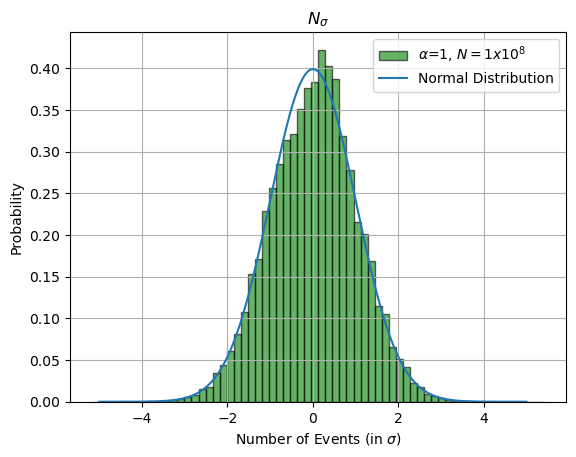

In [ ]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt

lambda_param = 20 # Average rate of occurance (lambda)
N = int(1e8) # Number of samples to generate

N_on = np.random.poisson(lambda_param, N)

N_off = np.random.poisson(lambda_param, N)

N_diff = N_on - N_off

N_diff_std_dev = np.std(N_diff)
N_diff_mean = np.mean(N_diff)
print(N_diff)
print("Mean of N_diff distribution:", N_diff_mean)
print(N_diff_std_dev)
print("Square root of lambda =", np.sqrt(lambda_param))

# %% Plot the histogram for N_sigma distribution

#
N_sigma = (N_diff) / (N_on + N_off)**(1/2)

mean = 0
N_sigma_std_dev = np.std(N_sigma)

# Generate x values
x = np.linspace(mean - 5 * N_sigma_std_dev, mean + 5 * N_sigma_std_dev, 1000)

# Compute the probability density function  
pdf = (1 / (N_sigma_std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / N_sigma_std_dev) ** 2)

bins2 = np.arange(min(N_sigma),max(N_sigma),0.165)

print(min(N_sigma))
print(max(N_sigma))

# Test for normality using Shapiro-Wilk test
statistic, p_value = shapiro(N_sigma)
print('Shapiro-Wilk test statistic:', statistic)
print('p-value:', p_value)

if p_value > 0.05:
    print('The data appears to be normally distributed.')
else:
    print('The data does not appear to be normally distributed.')

# Show the values that are above the 5 sigma significance level
print("There are", len(N_sigma[N_sigma>5]+len(N_sigma[N_sigma<5])),"data points over the +5 sigma threshold")

plt.hist(N_sigma, bins=bins2, edgecolor='black', density=True, alpha=0.6, 
         color='g', label=r'$\alpha$=1, $N=1 x 10^8$')
plt.plot(x, pdf, label='Normal Distribution')
plt.title('$N_\sigma$')
plt.xlabel('Number of Events (in $\sigma$)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

### N_on - 6N_off.py

There are 100000000 data points over the +5 sigma threshold


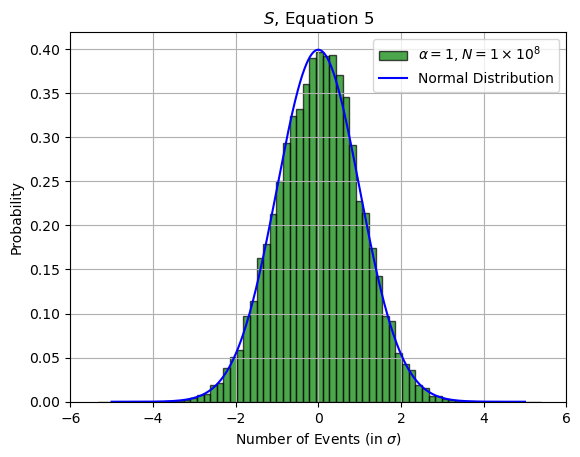

There are 100000000 data points over the +5 sigma threshold


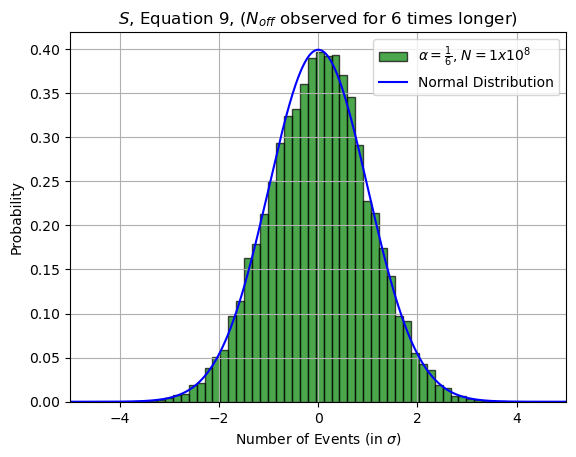

In [9]:
# Observe N_off for 6 times longer than N_on 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

lambda_param = 20  # Average rate of occurrence (lambda)
N = int(1e8)  # Number of samples to generate
alpha = 1  # Ratio of on-source time to off-source time

# Generate on-source Poisson samples
N_on = np.random.poisson(lambda_param, N)

# Adjust distribution size for off-source Poisson samples
N_off = np.random.poisson((1/alpha)*lambda_param, N)

# Calculate the signal counts (excess above the background) with the alpha parameter
N_sig = N_on - alpha*N_off

# Calculate new significane value
S = (N_sig) / (N_on + (alpha**2)*(N_off))**(1/2) # Equation 5

mean = 0
N_sig_std_dev = np.std(S)

# Define the range of significances 
x = np.linspace(-5, 5, 1000)  # Adjust the number of points for desired resolution

# Compute the probability density function  
pdf = (1 / (N_sig_std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / N_sig_std_dev) ** 2)

# Count data points above 5 sigma
above_5_sigma = len(np.abs(S) >= 5)
print("There are", above_5_sigma, "data points over the +5 sigma threshold")

# Compute the number of bins
bins1 = np.arange(min(S), max(S), 0.16)

# Plot histogram and normal distribution
plt.hist(S, bins=bins1, edgecolor='black', density=True, alpha=0.7, color='g', label=r'$\alpha=1$, $N=1 \times 10^8$')
plt.plot(x, pdf, color='b', label='Normal Distribution')
plt.title("$S$, Equation 5")
plt.xlim(-6,6)
plt.xlabel('Number of Events (in $\sigma$)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


# %%  Plot the histogram for new N_sigma distribution

S = (N_sig) / (alpha*(N_on + N_off))**(1/2) # Equation 9

# Count data points above 5 sigma
above_5_sigma = len(np.abs(S) > 5)
print("There are", above_5_sigma, "data points over the +5 sigma threshold")

# Plot the histogram and the normal distribution
plt.hist(S, bins=bins1, edgecolor='black', density=True, alpha=0.7, 
         color='g', label=r'$\alpha=\frac{1}{6}$, $N=1 x 10^8$')
plt.plot(x, pdf, color='b', label='Normal Distribution')
plt.title("$S$, Equation 9, ($N_{off}$ observed for 6 times longer)")
plt.xlabel('Number of Events (in $\sigma$)')
plt.xlim(-5,5)
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

### Integreal Freq. Distributions

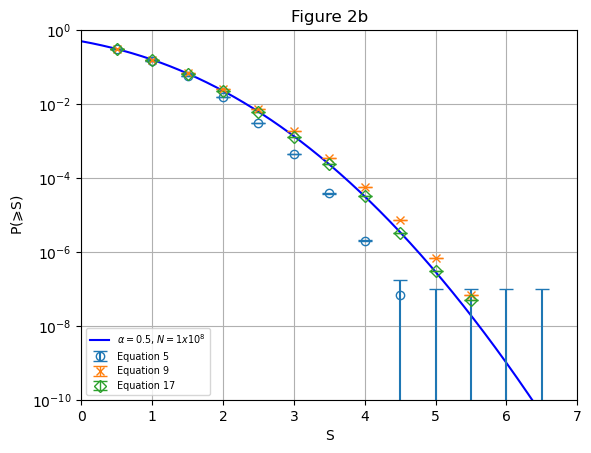

In [14]:
lambda_param = 20  # Average rate of occurrence (lambda)
N = int(1e8)  # Number of samples to generate
alpha = 1 / 2 # Ratio of on-source time to off-source time

# Generate on-source Poisson samples
N_on = np.random.poisson(lambda_param, N)

# Adjust distribution size for off-source Poisson samples
N_off = np.random.poisson((1/alpha)*lambda_param, N)

# Calculate the difference with the alpha parameter
N_diff = N_on - alpha*N_off

 # %%

# Equation 5
N_sigma5 = (N_diff) / (N_on + (alpha**2)*(N_off))**(1/2)

# Create an array with the desired significance values
significances1 = np.linspace(0.5, 7, 14)

# Count elements greater than each value 
ans = [np.sum(N_sigma5 > val) for val in significances1]

# Calculate the probability P
P_5 = np.array(ans) / N

# %%

# Equation 9
N_sigma9 = (N_diff) / (alpha*(N_on + N_off))**(1/2)

# Count elements greater than each value
ans = [np.sum(N_sigma9 > val) for val in significances1]

# Calculate the probability P
P_9 = np.array(ans) / N

# %%

# Calculate the difference with the alpha parameter
N_sig = N_on - alpha*N_off

N_sign_sig = np.sign(N_sig)

# Name some variables 
a = np.log(((1 + alpha)/alpha) * (N_on / (N_on + N_off)))
b = np.log((1 + alpha) * (N_off / (N_on + N_off)))

# Equation 17  
S = np.sqrt(2)*(N_on*a + N_off*b)**(1/2) 

S = S * N_sign_sig

# Count elements greater than each value in b
ans = [np.sum(S > val) for val in significances1]

# Calculate the probability P
P_17 = np.array(ans) / N

# %%

import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate significances from 0 to 7 with a step of 0.1
significances = np.arange(0, 7, 0.01)

# Calculate cumulative probabilities for each significance value
cumulative_probabilities = 1 - norm.cdf(significances)

errors_1 = np.ones(14) / (N)*(1e1)
errors_1[-1:] = 0

errors_2 = np.ones(14) / (N)*(1e1)
errors_2[-10:] = 0

errors_3 = np.ones(14) / (N)*(1e1)
errors_3[-10:] = 0

# Plotting
plt.plot(significances, cumulative_probabilities, color='b', label=r'$\alpha=0.5$, $N=1 x 10^8$')
plt.errorbar(significances1, P_5, yerr=errors_1, capsize=5, marker='o', markerfacecolor='none', linestyle='', label='Equation 5')
plt.errorbar(significances1, P_9, yerr=errors_2, capsize=5, linewidth=1, marker='x', markerfacecolor='none', linestyle='', label='Equation 9')
plt.errorbar(significances1, P_17, yerr=errors_3, capsize=5, linewidth=1, marker='D',markerfacecolor='none',  linestyle='', label='Equation 17')
plt.title('Figure 2b')
plt.yscale('log')
plt.xlim(0,7)
plt.ylim(1e-10, 1)
plt.xlabel('S')
plt.ylabel("P($\geqslant$S)")
plt.legend(fontsize='x-small', loc='lower left')
plt.grid(True)
plt.show()


### Simga ($\sigma$) build up over time

In [1]:
import numpy as np

lambda_param = 15  # Average rate of occurrence (lambda)
N = 1000  # Number of samples to generate
alpha = 1/6 # Ratio of on-source time to off-source time
max_observation_time = 100  # Maximum observation time
max_S_value = 0  # Variable to store the maximum value of S

M = int(1e4)
for _ in range(M):  # Loop runs 1000 times
    # Generate on-source and off-source Poisson samples
    N_on = np.random.poisson(lambda_param, N)
    N_off = np.random.poisson((1/alpha) * lambda_param, N)
    
    # Initialize arrays to store observation times and corresponding sigma values
    observation_times = np.arange(0, max_observation_time + 1)  # Observation times from 1 to max_observation_time
    sigma_values = []

    # Calculate the difference with the alpha parameter for each observation time
    for observation_time in observation_times:
        # Calculate the sum of on-source and off-source events up to the current observation time
        N_on_current = np.sum(N_on[:observation_time])
        N_off_current = np.sum(N_off[:observation_time])

        # Calculate the difference
        N_diff = N_on_current - alpha * N_off_current

        # Calculate the sign of N_diff
        N_sign_sig = np.sign(N_diff)

        # Name some variables 
        a = np.log(((1 + alpha) / alpha) * (N_on_current / (N_on_current + N_off_current)))
        b = np.log((1 + alpha) * (N_off_current / (N_on_current + N_off_current)))

        # Equation 17  
        S = np.sqrt(2 * (N_on_current * a + N_off_current * b))

        S = S * N_sign_sig
        
        # Update max_S_value if necessary
        max_S_value = max(max_S_value, S)  

# Print the maximum value of S
print("Maximum value of S:", max_S_value)



C:\Users\seano\AppData\Local\Temp\ipykernel_25512\1546542603.py:32: RuntimeWarning: invalid value encountered in scalar divide
  a = np.log(((1 + alpha) / alpha) * (N_on_current / (N_on_current + N_off_current)))
C:\Users\seano\AppData\Local\Temp\ipykernel_25512\1546542603.py:33: RuntimeWarning: invalid value encountered in scalar divide
  b = np.log((1 + alpha) * (N_off_current / (N_on_current + N_off_current)))


Maximum value of S: 4.607138076267029
Maximum value of S: 4.607138076267029


### Sigma ($\sigma$) build up over time with plots

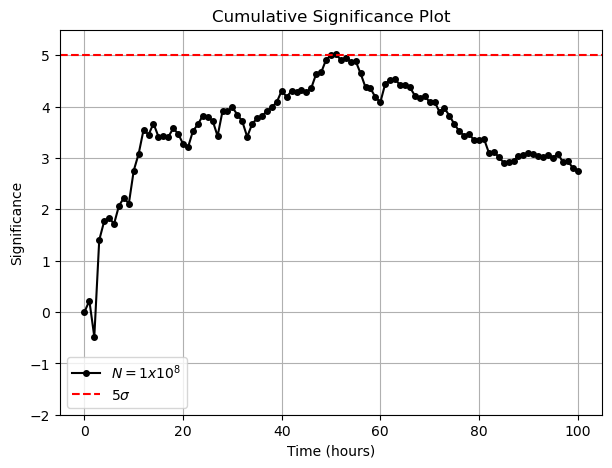

Maximum sigma value 5.021598509066084
Number of times signal exceeded 5 sigma (looking every hour): 1
Number of times signal exceeded 5 sigma (looking every 10 hours): 0
Number of times signal exceeded 3.5 sigma (after 100hrs): 0


In [3]:
import  matplotlib.pyplot as plt
import numpy as np

lambda_param = 15  # Average rate of occurrence (lambda)
N = 101  # Time spent looking at signal (hours)
alpha = 1/6 # Ratio of on-source time to off-source time
num_iterations = int(1e8)  # Number of iterations

N_1hr = 0
N_10hr = 0
N_25hr = 0

for _ in range(num_iterations):
    # Generate on-source and off-source Poisson samples
    N_on = np.random.poisson(lambda_param, N)
    N_off = np.random.poisson((1/alpha) * lambda_param, N)

    # Calculate the sum of on-source and off-source events
    N_on_cumsum = np.cumsum(N_on)
    N_off_cumsum = np.cumsum(N_off)
    
    N_diff = N_on_cumsum - alpha*N_off_cumsum
    
    sign_sig = np.sign(N_diff)
    
    # Calculate S for each observation time
    a = np.log(((1 + alpha) / alpha) * (N_on_cumsum / (N_on_cumsum + N_off_cumsum)))
    b = np.log((1 + alpha) * (N_off_cumsum / (N_on_cumsum + N_off_cumsum)))
    S = np.sqrt(2 * (N_on_cumsum * a + N_off_cumsum * b))
    
    S = S * sign_sig
    
    # Check if maximum signal significance exceeds threshold every 1 hours
    if max(S)>=5:
        N_1hr += 1
        # plot the data when 5 sigma is exceeded (pre-trials)
        plt.figure(figsize=(7, 5))
    
        plt.plot(range(N), S, marker='o',markersize=4, linestyle='-',color='black', label=r'$N=1 x 10^8 $')
        plt.title('Cumulative Significance Plot')
        plt.xlabel('Time (hours)')
        plt.ylabel('Significance')
        plt.ylim(-2,5.5)
        plt.axhline(y=5, color='red', linestyle='--', label='$5\sigma$')
        plt.legend()
        plt.grid(True)
        plt.show()
        break
    
    # Check if maximum signal significance exceeds threshold every 10 hours
    if max(S[::10]) >= 5:
        N_10hr += 1
    
    # Check if maximum signal significance exceeds threshold after 100 hours
    if S[-1]>=5:
        N_25hr += 1
        
        

# Print the maximum value of S
print('Maximum sigma value', max(S))  
print("Number of times signal exceeded 5 sigma (looking every hour):", N_1hr)
print("Number of times signal exceeded 5 sigma (looking every 10 hours):", N_10hr)
print("Number of times signal exceeded 3.5 sigma (after 100hrs):", N_25hr)


### NGC1275 Plot

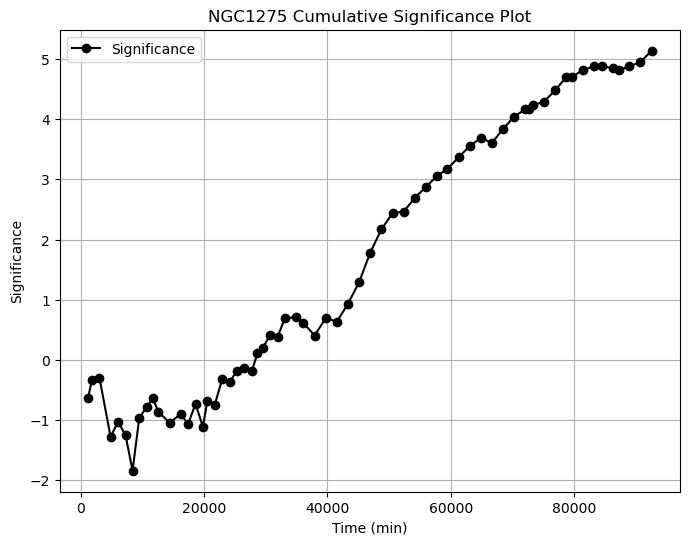

    Time (min)  Significance
0         1202     -0.633113
1         1864     -0.335553
2         3066     -0.300988
3         4869     -1.277410
4         6085     -1.028470
..         ...           ...
59       86335      4.844970
60       87207      4.811080
61       88928      4.877390
62       90736      4.948050
63       92539      5.136990

[64 rows x 2 columns]
   Time (min)  Significance
0        1202     -0.633113
1        1864     -0.335553
2        3066     -0.300988
3        4869     -1.277410
4        6085     -1.028470
   Time (min)  Significance
0        1202     -0.633113
1        1864     -0.335553
2        3066     -0.300988
3        4869     -1.277410
4        6085     -1.028470
Index(['Time (min)', 'Significance'], dtype='object')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r"C:\Users\seano\OneDrive\Desktop\Final Year Project\Excel Graphs+Data\NGC1275-Radio Galaxy Data (1).xlsx")

df = pd.DataFrame(data, columns=["Time (min)","Significance"])

ax = df.plot(x='Time (min)', y='Significance', kind='line', marker='o', linestyle='-',color='black', figsize=(8, 6))

ax.set_xlabel('Time (min)')
ax.set_ylabel('Significance')
ax.set_title('NGC1275 Cumulative Significance Plot')
ax.grid(True)

plt.show()

print(df)
print(data.head())
print(df.head())
print(data.columns)